[[  7 334]
 [  7 352]]
Logistic Regression Train Accuracy:  51.29%
[[  3 146]
 [  4 147]]
Logistic Regression Test Accuracy:  50.00%


[Text(-0.25, 0, ''),
 Text(0.0, 0, ''),
 Text(0.25, 0, ''),
 Text(0.5, 0, ''),
 Text(0.75, 0, ''),
 Text(1.0, 0, ''),
 Text(1.25, 0, ''),
 Text(1.5, 0, ''),
 Text(1.75, 0, ''),
 Text(2.0, 0, ''),
 Text(2.25, 0, '')]

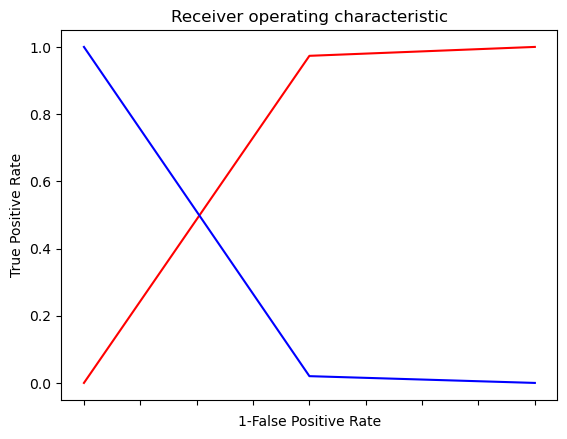

In [1]:
##############################  ROC-AUC  ##############################

#Step-1: Reading the data

import pandas as pd

df=pd.read_csv(r'~/Desktop/HealthCare_Insurance_Segmentation/Datasets/FE_data.csv')

#Step-2: Train and Test Split

from sklearn.model_selection import train_test_split
import numpy as np

X=df.iloc[:,0:-1]
Y=df["Renewal"]

#Considering the 30% for test dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#############################################################
#################### Logistic Regression ####################
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
logit=LogisticRegression().fit(X_train,Y_train)

# Evaluation on Training Data
print(confusion_matrix(Y_train, logit.predict(X_train)))
logit_train_acc = accuracy_score(logit.predict(X_train),Y_train)
print("Logistic Regression Train Accuracy: ","{:.2%}".format(logit_train_acc))
logit_train_f1 = f1_score(logit.predict(X_train),Y_train)
logit_train_class = classification_report(logit.predict(X_train),Y_train)
# Evaluation on Testing Data
print(confusion_matrix(Y_test,logit.predict(X_test)))
logit_test_acc = accuracy_score(logit.predict(X_test),Y_test)
print("Logistic Regression Test Accuracy: ","{:.2%}".format(logit_test_acc))
logit_test_f1 = f1_score(logit.predict(X_test),Y_test)
logit_test_class = classification_report(logit.predict(X_test),Y_test)
#ROC Curve

from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(Y_test,logit.predict(X_test))
optimal_index=np.argmax(tpr-fpr)
optimal_threshold=thresholds[np.argmax(tpr-fpr)]

# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(tpr, color = 'red')
plt.plot(1-fpr, color = 'blue')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])
